In [12]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
data=pd.read_csv('dogs_n_cats.csv')
X=data.drop('Вид',axis=1)
y=data['Вид']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42) # Метод для разделения на тестовую и нашу выборку

In [14]:
data_test=pd.read_json('dataset_209691_15.txt')
data_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,26,31.2,1,1,0
1,15,18.0,1,1,0
2,33,39.6,1,1,0
3,31,37.2,1,1,0
4,24,28.8,1,1,0
...,...,...,...,...,...
95,8,3.2,1,0,1
96,11,4.4,1,0,0
97,12,4.8,1,0,1
98,13,5.2,1,0,1


In [15]:
from sklearn.model_selection import cross_val_score
max_depth_list=[]
train_score_list=[]
test_score_list=[]
mean_cross_val_score_list=[]
for max_depth in range(1,100):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score=cross_val_score(clf,X_train,y_train,cv=5).mean()
    max_depth_list.append(max_depth)
    train_score_list.append(train_score)
    test_score_list.append(test_score)
    mean_cross_val_score_list.append(mean_cross_val_score)
score_data = pd.DataFrame({'max_depth': max_depth_list, 'train_score': train_score_list,\
                           'test_score': test_score_list,'cross_val_score':mean_cross_val_score_list})

In [16]:
scores_data_long=pd.melt(score_data,id_vars=['max_depth'],value_vars=['train_score','test_score','cross_val_score']\
                         ,var_name='set_type',value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

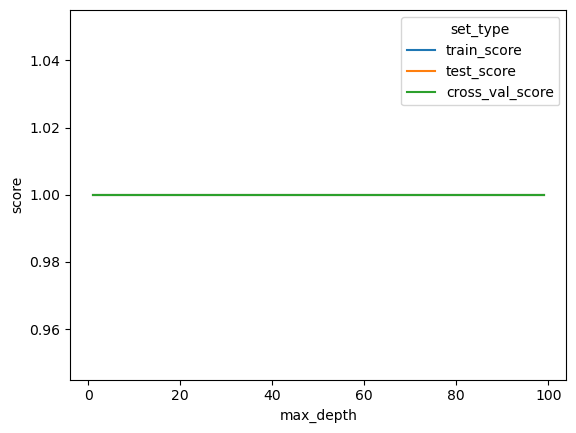

In [17]:
sns.lineplot(x="max_depth",y="score",hue="set_type",data=scores_data_long)

In [29]:
data_test=pd.read_json('dataset_209691_15 (4).txt')
data_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,29,34.8,1,1,0
1,32,38.4,1,0,0
2,24,28.8,1,1,0
3,27,32.4,1,1,0
4,24,28.8,1,1,0
...,...,...,...,...,...
95,9,3.6,1,0,1
96,10,4.0,1,0,1
97,6,2.4,1,0,1
98,11,4.4,1,0,1


In [30]:
list(clf.predict(data_test)).count('собачка')

40